<a href="https://colab.research.google.com/github/NadiaHolmlund/Semester_Project/blob/main/PoC_ver_0_Streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Pip installs
!pip install -q transformers==4.28.0 # Installing version 4.28.0 to circumvent an issue with Accelerator and the introduction of PartialState in later versions
!pip install -q transformers datasets

In [ ]:
from transformers import ViTImageProcessor, ViTForImageClassification, ViTModel
from PIL import Image
import requests

# Model pipeline

In [ ]:
#Examples
# https://c0.wallpaperflare.com/preview/990/418/320/adorable-black-and-white-black-and-white-boy.jpg
# https://c1.wallpaperflare.com/preview/426/469/292/snarling-child-frown-teeth.jpg

In [ ]:
url = 'https://c0.wallpaperflare.com/preview/990/418/320/adorable-black-and-white-black-and-white-boy.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('NadiaHolmlund/Semester_Project', num_labels= 7, ignore_mismatched_sizes=True)

Some weights of the model checkpoint at NadiaHolmlund/Semester_Project were not used when initializing ViTForImageClassification: ['vit.pooler.dense.weight', 'vit.pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
emotion_id = [0, 1, 2, 3, 4, 5, 6]
emotion_label = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']

id2label = {id: label for id, label in zip(emotion_id, emotion_label)}
label2id = {label: id for id, label in id2label.items()}

In [ ]:
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [ ]:
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", id2label[predicted_class_idx])

Predicted class: Sadness


In [ ]:
# Verify the shape of the classifier weight and bias
print(model.classifier.weight.shape)  # Should be torch.Size([7, 768])
print(model.classifier.bias.shape)  # Should be torch.Size([7])

torch.Size([7, 768])
torch.Size([7])


# Creating a dataset for testing

In [ ]:
print(outputs.logits)

tensor([[-0.0777, -0.0703, -0.0514, -0.0005,  0.2331,  0.1848,  0.0028]],
       grad_fn=<AddmmBackward0>)


In [ ]:
values = tensor.tolist()[0]

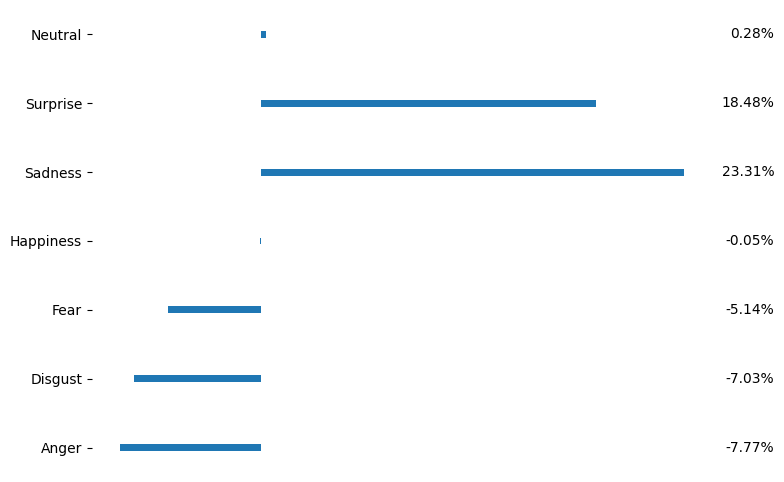

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.barh(emotion_label, logits_values, height=0.1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

text_position = max(logits_values) + 0.05  # Define the fixed position for the text

for i, bar in enumerate(bars):
    ax.text(text_position, bar.get_y() + bar.get_height() / 2,
            f'{logits_values[i]*100:.2f}%', va='center', ha='right')

plt.xticks([])  # Hide the x-axis tick labels

# Display the plot using st.pyplot()
st.pyplot(fig)


# Streamlit

In [ ]:
# PoC Streamlit application

# Imports
import streamlit as st
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import torch
#import matplotlib.pyplot as plt

# Setting up page configurations
st.set_page_config(
    page_title="Home",
    page_icon="💀",
    layout="wide")

# Loading data, models, scalers, explainers, etc., only once
@st.experimental_singleton
def read_objects():
    # Importing processor and model
    processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
    model = ViTForImageClassification.from_pretrained('NadiaHolmlund/Semester_Project', num_labels= 7, ignore_mismatched_sizes=True)
   
    # Creating labels
    emotion_id = [0, 1, 2, 3, 4, 5, 6]
    emotion_label = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']
    id2label = {id: label for id, label in zip(emotion_id, emotion_label)}

    img_angry = st.image('NadiaHolmlund/Semester_Project/pages/Streamlit_content/img_angry.jpg')
    img_sad = st.image('NadiaHolmlund/Semester_Project/pages/Streamlit_content/img_sad.jpg')
    img_happy = st.image('NadiaHolmlund/Semester_Project/pages/Streamlit_content/img_happy.jpg')

    return processor, model, emotion_id, emotion_label, id2label, img_angry, img_sad, img_happy


processor, model, emotion_id, emotion_label, id2label, img_angry, img_sad, img_happy = read_objects()








# Defining a function to classify the image
def classify_image(image):
    inputs = processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits

    # Model predicts one of the 7 emotion classes
    predicted_class_id = logits.argmax(-1).item()
    predicted_class_label = id2label[predicted_class_id]

    return predicted_class_label











tab1, tab2 = st.tabs(['PoC on stock images', 'PoC on yourself'])






with tab1:
    col1, col2 = st.columns(2)

    with col1:
        

    with col1:
        st.write("hello")
















with tab2:
    col1, col2 = st.columns(2)

    with col1:
        img_file_buffer = st.camera_input("Take a picture")

        if img_file_buffer is not None:
            # Read image file buffer as a PIL Image:
            img = Image.open(img_file_buffer)
            
            # Apply classification model to the image
            classification = classify_image(img)










    with col2:
        st.write()'hello')
        #if img_file_buffer is not None:
            #logits = outputs.logits
            #labels = emotion_label

            #values = logits.tolist()[0]

            #plt.figure(figsize=(8, 6))
            #plt.barh(labels, values)
            #plt.xlabel('Logit Value')
            #plt.ylabel('Label')
            
            # Display the graph in Streamlit
            #st.pyplot(plt)



In [ ]:
# Loading processor, model, labels and images only once
@st.experimental_singleton
def read_objects():
    # Importing processor and model
    processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
    model = ViTForImageClassification.from_pretrained('NadiaHolmlund/Semester_Project', num_labels= 7, ignore_mismatched_sizes=True)
   
    # Creating labels
    emotion_id = [0, 1, 2, 3, 4, 5, 6]
    emotion_label = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'Neutral']
    id2label = {id: label for id, label in zip(emotion_id, emotion_label)}

    # Importing images
    img_anger = Image.open(BytesIO(requests.get('https://github.com/NadiaHolmlund/Semester_Project/raw/main/Streamlit_content/img_anger.jpg').content))
    img_hapiness = Image.open(BytesIO(requests.get('https://github.com/NadiaHolmlund/Semester_Project/raw/main/Streamlit_content/img_happiness.jpg').content))
    img_sadness = Image.open(BytesIO(requests.get('https://github.com/NadiaHolmlund/Semester_Project/raw/main/Streamlit_content/img_sadness.jpg').content))

    return processor, model, emotion_id, emotion_label, id2label, img_anger, img_happiness, img_sadness

processor, model, emotion_id, emotion_label, id2label, img_anger, img_happiness, img_sadness = read_objects()